<a href="https://colab.research.google.com/github/srikant-ai/Deep_Learning_TensforFlow/blob/main/NN_Classifier_Tensorflow__for_moons_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, shuffle=True, noise=0.03, random_state=42)

In [ ]:
# Check the Features 
X

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [ ]:
#Check the Labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# Construct a Dataframe
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
...,...,...,...
995,0.793018,0.591402,0
996,-0.138777,0.968000,0
997,1.653915,-0.291798,1
998,-0.934102,0.353582,0


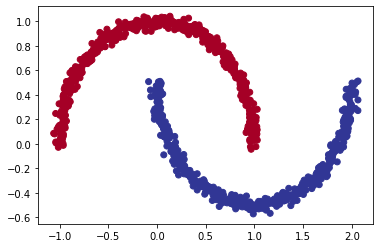

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1] ,c = y , cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shapes of our Features and labels 
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# Split into training and test
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random set
tf.random.set_seed(42)

#1. Create the Model using the Sequential API
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
          ])
#2. Compile the Model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the Model
history=model_1.fit(X_train,y_train,epochs=30,verbose=1)

Epoch 1/30
25/25 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.6000
Epoch 2/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4561 - accuracy: 0.8238
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8537
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8650
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.8788
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.8900
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.8925
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2069 - accuracy: 0.9038
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1999 - accuracy: 0.9075
Epoch 10/30
25/25 [==============================] - 0s 1ms/step - loss: 0.1885 - accuracy: 0.9125
Epoch 11/30
25/25 [

In [ ]:
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 1.0000


[0.019427210092544556, 1.0]

In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a mode predicting on X.
  """

  # Define the Axis Boundaries of the plot and create a meshgrid
  x_min , x_max = X[:, 0].min() -0.1 , X[:, 0].max() + 0.1 
  y_min , y_max = X[:, 1].min() -0.1 , X[:, 1].max() + 0.1

  xx , yy = np.meshgrid(np.linspace(x_min, x_max ,100),
                        np.linspace(y_min, y_max ,100))
  
  # Create X Value 
  x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D Arrays together

  # make Preictions
  y_pred=model.predict(x_in)

  # Check for multi-calss 
  if len(y_pred[0]) >1:
    print('Multicalss Classification')
    # we have to reshape the prediction to get them ready for ploting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  ### plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha =0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max()) 

Binary Classification
Binary Classification


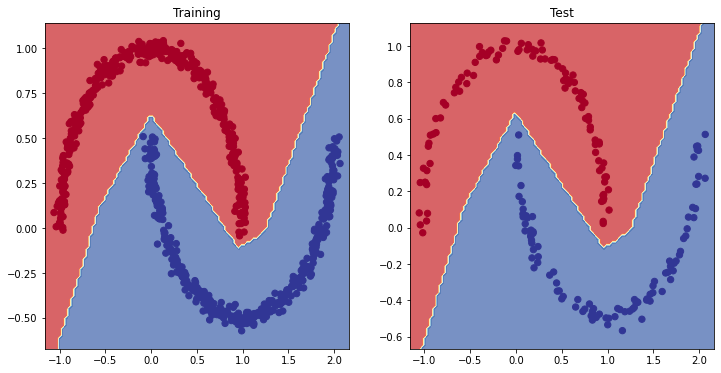

In [ ]:
# Check out the predictions made by our model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model=model_1,
                      X=X_train,
                      y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model=model_1,
                      X=X_test,
                      y=y_test)
plt.show()